In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [3]:
cars_data =  pd.read_csv(r'C:\Users\DeLL\Desktop\Span_new.csv')
cars_data.head()

,Unnamed: 0,ID,make,model,months_old,power,gear_type,fuel_type,kms,price,age
0,0,97860,Porsche,911,240.0,210.0,manual,gasoline,202000.0,999999,1998.0
1,1,27821,Ford,Mustang,54.0,487.0,manual,gasoline,30000.0,685000,2013.0
2,2,97801,Porsche,911,358.0,220.0,manual,gasoline,56300.0,555555,1988.0
3,3,98251,Porsche,911,14.0,368.0,manual,gasoline,2800.0,470000,2016.0
4,4,98250,Porsche,911,3.0,515.0,unknown,gasoline,10.0,450000,2017.0


In [4]:
cars_data = cars_data.drop_duplicates()
cars_data = cars_data.dropna()
cars_data = cars_data.drop(['Unnamed: 0', 'ID'], axis = 1)
cars_data = cars_data.rename({'age' : 'model_year'}, axis = 1)
cars_data.shape

(92385, 9)

In [5]:
variables_in_study = cars_data[['months_old', 'power','kms','price']]
# standardizing features
scaler = StandardScaler() 
scaler.fit(variables_in_study)
variables_in_study = scaler.transform(variables_in_study) #subtracts the mean and divides by the standard deviation

variables_in_study = pd.DataFrame(variables_in_study, columns = ['months_old', 'power','kms','price'])
independent_variables = variables_in_study[['months_old', 'power','kms']]
dependent_variable = variables_in_study['price']

In [6]:
variables_in_study.head()

,months_old,power,kms,price
0,3.098538,2.577409,1.579643,63.172076
1,-0.171992,9.057070,-0.706650,42.938830
2,5.173390,2.811332,-0.357060,34.624224
3,-0.875332,6.273389,-1.068204,29.128793
4,-1.068750,9.712054,-1.105290,27.844138


In [7]:
independent_variables.head()

,months_old,power,kms
0,3.098538,2.577409,1.579643
1,-0.171992,9.057070,-0.706650
2,5.173390,2.811332,-0.357060
3,-0.875332,6.273389,-1.068204
4,-1.068750,9.712054,-1.105290


In [8]:
dependent_variable.head()

0    63.172076
1    42.938830
2    34.624224
3    29.128793
4    27.844138
Name: price, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2)

In [10]:
print('cars_data shape is: ', cars_data.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

cars_data shape is:  (92385, 9)
x_train shape is:  (73908, 3)
x_test shape is:  (18477, 3)
y_train shape is:  (73908,)
y_test shape is:  (18477,)


In [11]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

In [12]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.608
Method:                 Least Squares   F-statistic:                          3.821e+04
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        09:38:32   Log-Likelihood:                         -71510.
No. Observations:               73908   AIC:                                  1.430e+05
Df Residuals:                   73905   BIC:                                  1.431e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
months_old    -0.2004      0.004    -52.881      0.000      -0.208      -0.193
power          0.7054      0.002    300.101      0.000       0.701       0.710
kms           -0.2459      0.004    -64.963      0.000      -0.253      -0.239
==============================================================================
Omnibus:                   173071.699   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       8078995441.560
Skew:                          22.661   Prob(JB):                         0.00
Kurtosis:                    1622.081   Cond. No.                         2.90
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.6079913268306313
0.6079754141586942
months_old    0.0
power         0.0
kms           0.0
dtype: float64
months_old   -0.200352
power         0.705374
kms          -0.245921
dtype: float64


In [14]:
predictions = results.predict(x_test)

In [15]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.2992573715259076
MSE: 0.26688982585311494
RMSE: 0.5166138072613962
R-Squared: 0.6907020605818424


In [16]:
poly_reg = PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [17]:
predictions = lin_reg.predict(poly_reg.fit_transform(x_test))

In [18]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.21632823373030072
MSE: 0.1589634235079987
RMSE: 0.39870217394441015
R-Squared: 0.815777693373222


In [19]:
rdg = Ridge(alpha = 30)
rdg = rdg.fit(x_train, y_train)
predictions = rdg.predict(x_test)

In [20]:
print(rdg.score(x_train, y_train)) #R-squared
print(rdg.coef_)
print(rdg.intercept_)

0.6079918921288152
[-0.20033497  0.70507806 -0.2458126 ]
0.0011300029616446428


In [21]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.29933044676230647
MSE: 0.26688714943120506
RMSE: 0.5166112169041678
R-Squared: 0.6907051622803769


In [22]:
lasso = Lasso(alpha=0.01)
lasso = lasso.fit(x_train, y_train) 
prediction = lasso.predict(x_test)

In [23]:
print(lasso.score(x_train, y_train))
print(lasso.coef_)
print(lasso.intercept_)

0.6077699863554595
[-0.1945356   0.69447772 -0.23965518]
0.0011299771548299224


In [24]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.29933044676230647
MSE: 0.26688714943120506
RMSE: 0.5166112169041678
R-Squared: 0.6907051622803769


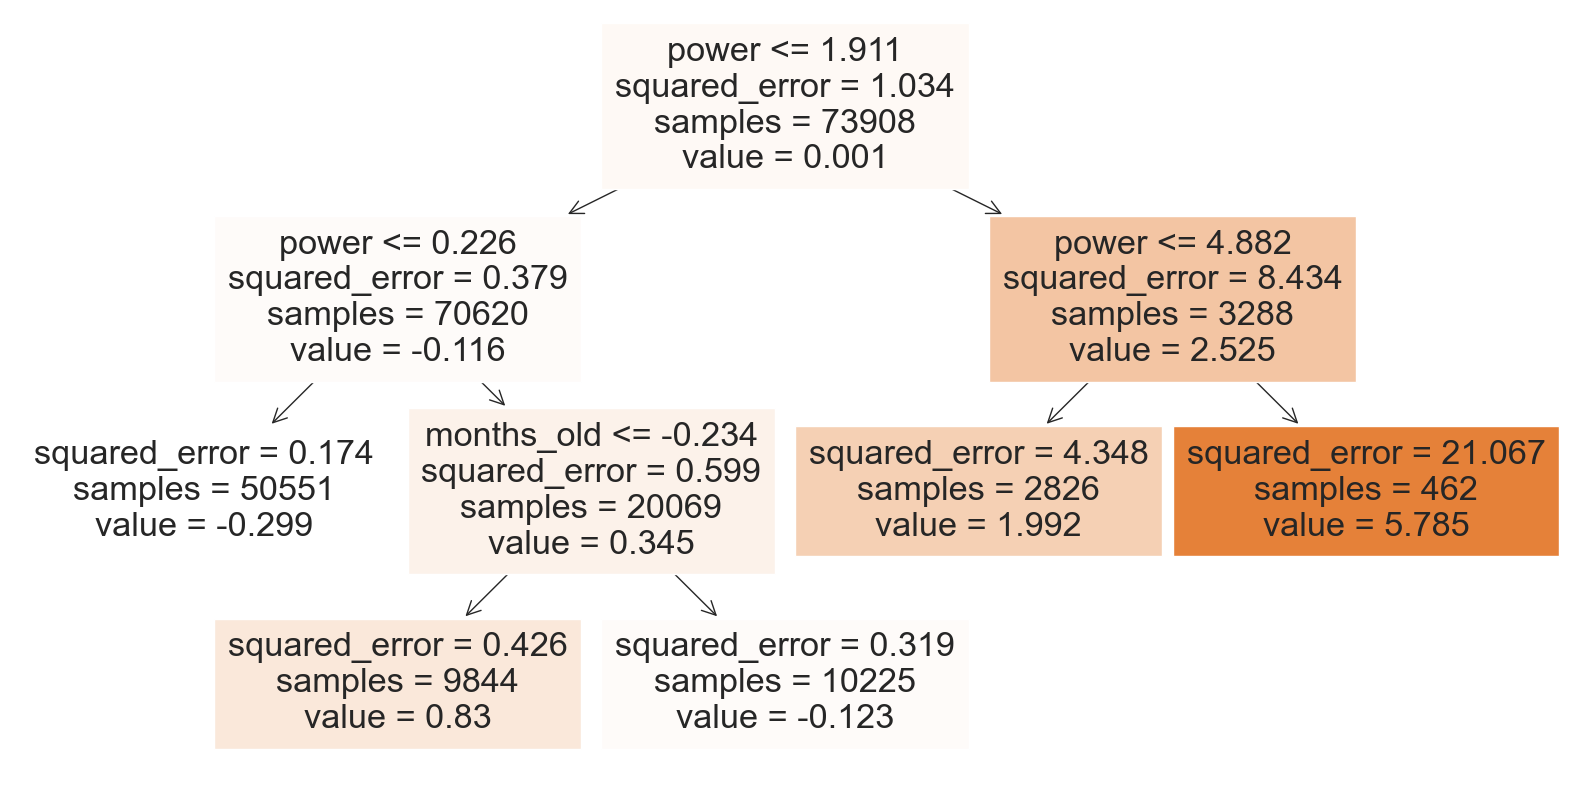

In [35]:
dtr = DecisionTreeRegressor(ccp_alpha = 0.05)
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dtr, filled=True, feature_names=x_train.columns)  # Assuming x_train is a pandas DataFrame
plt.show()

In [36]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.4007550294560206
MSE: 0.38368808228854195
RMSE: 0.6194256067426838
R-Squared: 0.5553448586816354


In [39]:
models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Decision tree regression' ]
#models_list = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression' ]

models_list
print(len(models_list))

5


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (5).

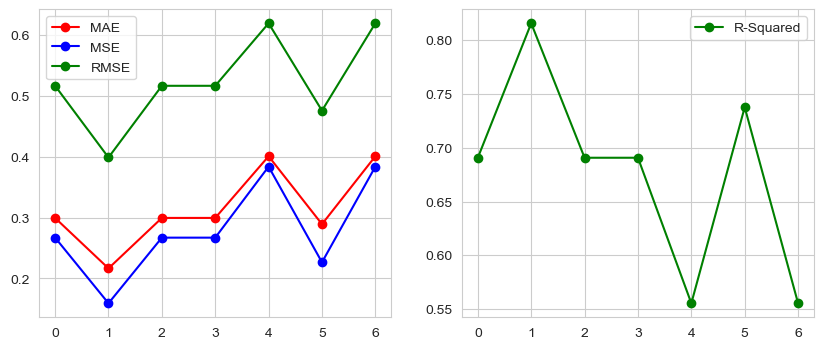

In [43]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(7))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()